# Powersensor 综合实例 part1

这部分教程主要包含如何使用powersensor完成一些日常任务。

引用需要的库

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import PowerSensor as ps

初始化摄像头和串口模块的操作对象

In [2]:
# 这个对象用于操作摄像头
cam1 = ps.ImageSensor()
# 这个对象用于操作串口
s1 = ps.UsartPort()

# 二维码识别

1. 使用zbar识别通用的二维码
1. 使用apriltag库识别apriltag标识

## 使用zbar库识别通用二维码

很多网站都有提供在线的二维码图片生成工具，本文测试的二维码是用[https://cli.im/](https://cli.im/)生成的。

In [3]:
# 引用二维码库
import zbar
from pyzbar import pyzbar

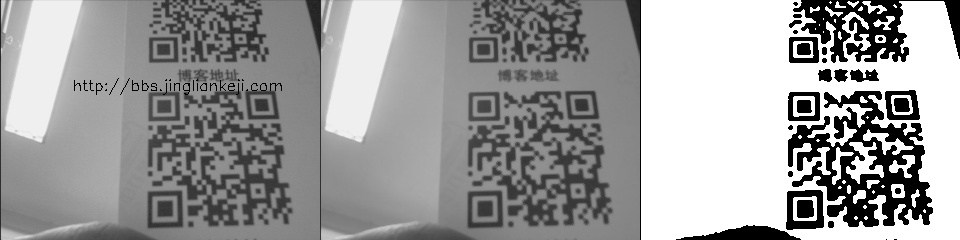

[Decoded(data='http://bbs.jingliankeji.com', type='QRCODE', rect=Rect(left=146, top=90, width=148, height=139), polygon=[Point(x=146, y=229), Point(x=294, y=223), Point(x=275, y=90), Point(x=148, y=91)])]
0.0872330665588


In [9]:
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 120, 255, cv2.THRESH_BINARY) # 全局二值化
    # 识别二维码
    result = pyzbar.decode(img_binary)
    # 把结果标在图片上
    if len(result) == 0:
        pass
    else:
        font=cv2.FONT_HERSHEY_SIMPLEX
        text_x = result[0][2][0]
        text_y = result[0][2][1]
        text_wid = result[0][2][2]
        cv2.putText(img_gray, result[0][0], (text_x - text_wid / 2 , text_y), font, 0.5, 0, 1)
        
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------       
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_mid, img_binary])
    ps.CommonFunction.show_img_jupyter(img_combine)# 打印用于差分的两张图片
    print(result)
    print(end - start)
    time.sleep(0.1)

## 使用apriltag库识别apriltag标记

运行程序后，保持Tag36h11在画面里，然后往上下左右移动，在画面的下方可以看到输出的坐标值，第一个是横坐标，第二个是纵坐标。

In [3]:
# 引用库
import apriltag

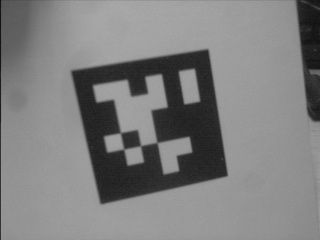

[154.44482476 127.03884661]
Tim:17


In [4]:
detector = apriltag.Detector()
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 120, 255, cv2.THRESH_BINARY) # 全局二值化
    # 识别二维码
    result = detector.detect(img_binary)
        
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------       
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray])
    ps.CommonFunction.show_img_jupyter(img_combine)# 打印用于差分的两张图片
    if len(result) > 0:
        print(result[0][6])
        res = 'Res:' + str(result[0][6])
        s1.u_print(res)
#         time.sleep(1)
    tim_str = 'Tim:' + str((int)((end - start)*1000))
    print(tim_str)
    time.sleep(0.1)

实际上result提供了更丰富的信息，可以用来完整定位标签的位置和姿态，大家可以自行开发，或许等待后续教程。
```python
print(result[0])
        Family: tag36h11
            ID: 0
    Hamming error: 0
        Goodness: 0.0
    Decision margin: 124.666664124
        Homography: [[ 7.02583484e-01 -2.35382052e-01  4.84189739e+00] # 单应矩阵，自行百度
                      [-6.82695217e-02  4.98301018e-01  2.90763050e+00]
                      [-2.24977475e-04 -1.27799591e-03  2.34032006e-02]]
        Center: [206.89039396 124.24072034] # 这个是像素位置
        Corners: [[175.64704895  99.47730255] # 这个是四个角点的像素位置，可以用这个来确定画面旋转的角度
                      [236.33509827  95.72452545]
                      [242.42208862 152.40307617]
                      [174.67114258 155.44396973]]
```


In [9]:
print(result[0])

         Family: tag36h11
             ID: 0
  Hamming error: 0
       Goodness: 0.0
Decision margin: 124.666664124
     Homography: [[ 7.02583484e-01 -2.35382052e-01  4.84189739e+00]
                  [-6.82695217e-02  4.98301018e-01  2.90763050e+00]
                  [-2.24977475e-04 -1.27799591e-03  2.34032006e-02]]
         Center: [206.89039396 124.24072034]
        Corners: [[175.64704895  99.47730255]
                  [236.33509827  95.72452545]
                  [242.42208862 152.40307617]
                  [174.67114258 155.44396973]]


## 使用Haar实现人脸检测
本章节使用训练分类器查找人的正脸，侧脸，人体轮廓，包括猫脸等，当然如果你想自己训练各种识别目标的模型并生成xml文件，之后用于检测也是可以的。
如果更换了xml文件，只需要将训练文件上传到目录，之后更改程序中classifier的名称即可。本示例中我已经将人脸、猫脸、人眼检测的文件放到了当前目录下，直接更改相应名称即可使用。
如果您想用别人训练好的文件，可以百度google搜索一下对应的，基本的人脸训练xml文件可以在我给出的博客链接中下载。

Harr模板参考：
https://github.com/opencv/opencv/tree/master/data/haarcascades

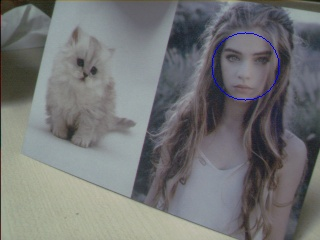

0.167599916458


In [7]:
classifier=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")   #确保此xml文件与该py文件在一个文件夹下，否则将这里改为绝对路径，此xml文件可在D:\My Documents\Downloads\opencv\sources\data\haarcascades下找到。

for i in range(10):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()  # 读入图像
    
    tempImg = cv2.resize(imgMat, (320,240))  # 缩小图像为320x240尺寸
    
    image=cv2.cvtColor(tempImg,cv2.COLOR_BGR2GRAY)
    cv2.equalizeHist(image)
    divisor=8
    h=320
    w=240
    minSize=(w/divisor,h/divisor)
    faceRects=classifier.detectMultiScale(image,1.2,2,cv2.CASCADE_SCALE_IMAGE,minSize)

    
    if len(faceRects)>0:
        for faceRect in faceRects:  
            x,y,w,h=faceRect
            cv2.circle(tempImg,(x+w/2,y+h/2),min(w/2,h/2),(255,0,0))
#             cv2.circle(frame,(x+w/4,y+h/4),min(w/8,h/8),(255,0,0))
#             cv2.circle(frame,(x+3*w/4,y+h/4),min(w/8,h/8),(255,0,0))
#             cv2.rectangle(frame,(x+3*w/8,y+3*h/4),(x+5*w/8,y+7*h/8),(255,0,0))
 
    end = time.time()
    # 把图像拼接在一起显示
    ps.CommonFunction.show_img_jupyter(tempImg)# 打印用于差分的两张图片
    print(end - start)
    time.sleep(0.1)